In [1]:
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier, Pool, cv, CatBoostRegressor
from sklearn.model_selection import train_test_split
import datetime
from scipy.stats import mode, poisson, binom
from scipy.stats import mode
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, RobustScaler, MinMaxScaler, OrdinalEncoder, MaxAbsScaler, Normalizer
from boruta import BorutaPy
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedShuffleSplit, KFold
from tqdm.notebook import tqdm
import optuna
from optuna.samplers import TPESampler
from xgboost import XGBClassifier
from sklearn.model_selection import cross_validate
from sksurv.ensemble import GradientBoostingSurvivalAnalysis

In [2]:
import scipy
import implicit

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder, Normalizer, StandardScaler, MinMaxScaler
from sklearn.metrics import roc_curve, roc_auc_score

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F
import torch.optim.lr_scheduler as lr_scheduler
from adabelief_pytorch import AdaBelief
import time

In [6]:
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
from lifelines.utils import concordance_index

In [9]:
cat_col = ['most_season_of_year__agg_user', 'most_time_of_day__agg_user', 'employee_count_nm']

In [10]:
best_xgb_params_1 = {'n_estimators': 853,
             'learning_rate': 0.013661226489861992,
             'gamma': 0.11696969571136726,
             'subsample': 0.8049967773710163,
             'colsample_bytree': 0.3339055630223215,
             'max_depth': 7,
             'min_child_weight': 20,
             'reg_lambda': 3.889298224761356e-08,
             'reg_alpha': 3.2391819292617063e-06}

best_xgb_params_1['booster'] = 'gbtree'
best_xgb_params_1['grow_policy'] = 'depthwise'
best_xgb_params_1['objective'] = 'binary:logistic'  # Change to binary:logistic for binary classification
best_xgb_params_1["tree_method"] = "hist"
best_xgb_params_1["device"] = "cuda"
best_xgb_params_1["verbosity"] = 0

best_xgb_params_2 = {'n_estimators': 628,
 'learning_rate': 0.011748077668768182,
 'gamma': 0.31412508230969277,
 'subsample': 0.9558366431635512,
 'colsample_bytree': 0.11467178668260138,
 'max_depth': 12,
 'min_child_weight': 41,
 'reg_lambda': 0.07209060869092707,
 'reg_alpha': 0.00011424097075460839}

best_xgb_params_2['booster'] = 'gbtree'
best_xgb_params_2['grow_policy'] = 'depthwise'
best_xgb_params_2['objective'] = 'binary:logistic'  # Change to binary:logistic for binary classification
best_xgb_params_2["tree_method"] = "hist"
best_xgb_params_2["device"] = "cuda"
best_xgb_params_2["verbosity"] = 0


best_xgb_params_3 = {'n_estimators': 745, 
                     'learning_rate': 0.010107163356923585, 
                     'gamma': 0.1264925762995308, 
                     'subsample': 0.7739876750886237, 
                     'colsample_bytree': 0.5179473786776867, 
                     'max_depth': 8, 'min_child_weight': 26, 
                     'reg_lambda': 8.44621455470876e-08,
                     'reg_alpha': 0.2801246418297865}

best_xgb_params_3['booster'] = 'gbtree'
best_xgb_params_3['grow_policy'] = 'depthwise'
best_xgb_params_3['objective'] = 'binary:logistic'  # Change to binary:logistic for binary classification
best_xgb_params_3["tree_method"] = "hist"
best_xgb_params_3["device"] = "cuda"
best_xgb_params_3["verbosity"] = 0

best_xgb_params_4 = {'n_estimators': 922,
                     'learning_rate': 0.025507599212763642,
                     'gamma': 0.1865581414149164,
                     'subsample': 0.7854537340786112,
                     'colsample_bytree': 0.18369851525898526,
                     'max_depth': 3,
                     'min_child_weight': 47,
                     'reg_lambda': 1.1449260032403026e-08,
                     'reg_alpha': 8.40155861926593e-07}


best_xgb_params_4['booster'] = 'gbtree'
best_xgb_params_4['grow_policy'] = 'depthwise'
best_xgb_params_4['objective'] = 'binary:logistic'  # Change to binary:logistic for binary classification
best_xgb_params_4["tree_method"] = "hist"
best_xgb_params_4["device"] = "cuda"
best_xgb_params_4["verbosity"] = 0

best_xgb_params_5 = {'n_estimators': 955,
                     'learning_rate': 0.0102295236358994,
                     'gamma': 0.12023113482682993,
                     'subsample': 0.7648289898116127,
                     'colsample_bytree': 0.14129164111226958,
                     'max_depth': 19,
                     'min_child_weight': 63,
                     'reg_lambda': 3.9940671975904127e-07,
                     'reg_alpha': 8.480174695491063e-07}


best_xgb_params_5['booster'] = 'gbtree'
best_xgb_params_5['grow_policy'] = 'depthwise'
best_xgb_params_5['objective'] = 'binary:logistic'  # Change to binary:logistic for binary classification
best_xgb_params_5["tree_method"] = "hist"
best_xgb_params_5["device"] = "cuda"
best_xgb_params_5["verbosity"] = 0


cat_params_1 = {'iterations': 1184,
                'colsample_bylevel': 0.13040257880154318,
                'depth': 8, 'bootstrap_type': 'Bernoulli', 
                'l2_leaf_reg': 8.753773264677827, 
                'subsample': 0.5616578823756693,
                'scale_pos_weight': 1.1976750349743144,
                'random_strength': 0.47991140165950263, 
                'learning_rate': 0.019494278196021158, 
                'min_data_in_leaf': 7, 
                'cat_features': ['most_season_of_year__agg_user', 'most_time_of_day__agg_user', 'employee_count_nm'], 
                'boosting_type': 'Plain'}
cat_params_1['cat_features'] = cat_col 


cat_params_2 = {'iterations': 1311, 
                     'colsample_bylevel': 0.17551738677583945, 
                     'depth': 8, 
                     'bootstrap_type': 'MVS', 
                     'l2_leaf_reg': 4.67550056352784, 
                     'subsample': 0.9598936888218437, 
                     'scale_pos_weight': 1.8658056002484495,
                     'random_strength': 0.7825708527712321,
                     'learning_rate': 0.01799664439469639,
                     'min_data_in_leaf': 4,
                     'cat_features': ['most_season_of_year__agg_user', 'most_time_of_day__agg_user', 'employee_count_nm'],
                     'boosting_type': 'Plain'}

cat_params_2['cat_features'] = cat_col 


cat_params_3 = {'iterations': 1686, 
                'colsample_bylevel': 0.05121006576516264,
                'depth': 7, 
                'bootstrap_type': 'MVS', 
                'l2_leaf_reg': 9.493488381702742, 
                'subsample': 0.9193206638386658, 
                'scale_pos_weight': 2.88339175372185,
                'random_strength': 1.2280684827664923, 
                'learning_rate': 0.012156360604622102, 
                'min_data_in_leaf': 3, 
                'cat_features': ['most_season_of_year__agg_user', 'most_time_of_day__agg_user', 'employee_count_nm'], 
                'boosting_type': 'Plain'}
cat_params_3['cat_features'] = cat_col 

cat_params_4 = {'iterations': 1868,
                 'colsample_bylevel': 0.09129306235739947,
                 'depth': 8,
                 'bootstrap_type': 'Bernoulli',
                 'l2_leaf_reg': 4.824444180046867,
                 'subsample': 0.6830663196625929,
                 'scale_pos_weight': 0.6771106314182298,
                 'random_strength': 1.1902235753383072,
                 'learning_rate': 0.024939664452549727,
                 'min_data_in_leaf': 3}
cat_params_4['cat_features'] = cat_col 

cat_params_5 = {'iterations': 1184,
 'colsample_bylevel': 0.13040257880154318,
 'depth': 8,
 'bootstrap_type': 'Bernoulli',
 'l2_leaf_reg': 8.753773264677827,
 'subsample': 0.5616578823756693,
 'scale_pos_weight': 1.1976750349743144,
 'random_strength': 0.47991140165950263,
 'learning_rate': 0.019494278196021158,
 'min_data_in_leaf': 7,
 'cat_features': ['most_season_of_year__agg_user',
  'most_time_of_day__agg_user',
  'employee_count_nm'],
 'boosting_type': 'Plain'}
cat_params_5['cat_features'] = cat_col 

params_xgb = [best_xgb_params_2, best_xgb_params_3, best_xgb_params_5]
params_cat = [cat_params_3]


In [11]:
# class NET(nn.Module):
#     def __init__(self, input_size, hidden_size, output_size,num_layers=1, dropout=0.0):
#         super().__init__()

#         self.mlp = nn.Sequential(
#             nn.Linear(input_size, hidden_size),
#             nn.BatchNorm1d(hidden_size),
#             nn.ReLU(),                               #nn.Sigmoid nn.ReLU nn.LeakyReLU() nn.ELU() nn.Tanh()
#             nn.Linear(hidden_size, input_size),
#             nn.ReLU(),
#         )
        
#         self.encoder = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
#         self.decoder = nn.GRU(hidden_size, input_size, num_layers, batch_first=True)
        
#         self.fc = nn.Sequential(
            
#             nn.Linear(input_size, 256),
#             nn.BatchNorm1d(256),
#             nn.ReLU(),
#             nn.Dropout(dropout),
#             nn.Linear(256, 128),
#             nn.BatchNorm1d(128),
#             nn.ReLU(),
#             nn.Dropout(dropout),
#             nn.Linear(128, 64),
#             nn.BatchNorm1d(64),
#             nn.ReLU(),
#             nn.Dropout(dropout),
#             nn.Linear(64, output_size),
#             nn.Sigmoid())
        
#     def forward(self, x):
#         x = x.float()
#         x = self.mlp(x)
        
#         # Передайте x в LSTM как последовательность данных
#         output, _ = self.encoder(x)
#         # Передайте выход из первого LSTM во второй LSTM
#         output, _ = self.decoder(output)
#         probabilities = self.fc(output) 
#         return probabilities

In [12]:
df_client = pd.read_csv('clients.csv')
df_currency = pd.read_csv('currency_rk.csv')
df_mcc_codes = pd.read_csv('mcc_codes.csv')
df_report_dates = pd.read_csv('report_dates.csv')
df_transactions = pd.read_csv('transactions.csv')
df_train = pd.read_csv('train.csv')
fun_agg = ['count',  'sum','median','std','nunique']
fun_agg_min = ['sum','median','count']
df_transactions['sign'] = df_transactions['transaction_amt'].apply(lambda x: 'positive' if x >= 0 else 'negative')
df_client = df_client.merge(df_report_dates, on='report')
df_transactions = df_transactions.merge(df_client, on='user_id')
df_transactions[['currency_rk']] = df_transactions[['currency_rk']].map(lambda x: 0 if x != 1 else 1)
df_transactions['transaction_dttm'] = pd.to_datetime(df_transactions['transaction_dttm'])
df_transactions['day'] = df_transactions['transaction_dttm'].dt.day_of_year.astype(int)
df_transactions['transaction_dttm'] = pd.to_datetime(df_transactions['transaction_dttm'])
df_transactions['date'] = df_transactions['transaction_dttm'].dt.date
df_transactions['report_dt'] = pd.to_datetime(df_transactions['report_dt']).dt.date
df_transactions['delta_date'] = df_transactions['report_dt'] - df_transactions['date']
df_transactions.delta_date= df_transactions.delta_date.map(lambda x: x.days)
df_transactions['employee_count_nm'] = df_transactions['employee_count_nm'].fillna('НЕИЗВЕСТНО')
df_transactions 

,user_id,mcc_code,currency_rk,transaction_amt,transaction_dttm,sign,report,employee_count_nm,bankemplstatus,customer_age,report_dt,day,date,delta_date
0,3,3,1,-183.88,2022-01-28 12:05:33,negative,2,ОТ 101 ДО 500,0,3,2022-08-31,28,2022-01-28,215
1,3,3,1,-3206.44,2022-01-28 12:52:30,negative,2,ОТ 101 ДО 500,0,3,2022-08-31,28,2022-01-28,215
2,3,16,1,-153866.89,2022-02-16 14:45:56,negative,2,ОТ 101 ДО 500,0,3,2022-08-31,47,2022-02-16,196
3,3,56,1,-15144.60,2022-03-09 19:58:29,negative,2,ОТ 101 ДО 500,0,3,2022-08-31,68,2022-03-09,175
4,3,0,1,5297.91,2022-03-12 18:11:31,positive,2,ОТ 101 ДО 500,0,3,2022-08-31,71,2022-03-12,172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13075018,562740,155,1,-2484.37,2023-03-20 11:52:09,negative,12,НЕИЗВЕСТНО,0,0,2023-06-30,79,2023-03-20,102
13075019,562740,9,1,-187.66,2023-03-20 12:10:22,negative,12,НЕИЗВЕСТНО,0,0,2023-06-30,79,2023-03-20,102
13075020,562740,1,1,-891.93,2023-03-20 15:53:37,negative,12,НЕИЗВЕСТНО,0,0,2023-06-30,79,2023-03-20,102
13075021,562740,13,1,-464.47,2023-03-20 15:54:49,negative,12,НЕИЗВЕСТНО,0,0,2023-06-30,79,2023-03-20,102


In [13]:
t_d = df_transactions.groupby(['user_id','day'])['mcc_code'].nunique() 
# t_d = df_transactions.groupby(['user_id','day'])['day'].count() 
t1 = t_d[t_d>12].unstack()
t2 = df_train[['user_id']].merge(t1, on='user_id')

#Объедененные фичи
t = pd.read_csv('features_X_train__v3.csv')
t = t[~t['user_id'].isin(t2['user_id'])]
X = t.drop('target', axis=1)
y = t['target']


#Определение категориальных
cat_col = X.select_dtypes(include=['object']).columns.tolist()
y.shape, X.shape

((63971,), (63971, 1154))

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, y,\
                        test_size = 0.20, random_state = 142, stratify=y)
# print(x_train.shape)
# x_concat = []
# y_concat = []
# for i in tqdm(range(35)):
#     x_x = x_train.loc[y_train[y_train == 1]]
#     y_x = y_train[y_train == 1]
#     x_concat.append(x_x)
#     y_concat.append(y_x)


# x_train = pd.concat([x_train] + x_concat)
# y_train = pd.concat([y_train] + y_concat)
# x_train.index = range(x_train.shape[0])
# y_train.index = range(x_train.shape[0])
# x_train = x_train.sample(frac=1)
# y_train = y_train.loc[x_train.index]
# x_train.index = range(x_train.shape[0])
# y_train.index = range(x_train.shape[0])
                    


# print(x_train.shape[0], y_train.shape[0])

In [15]:
predictions = []
score = []
models = []

In [16]:
t_d = df_transactions.groupby(['user_id','day'])['mcc_code'].nunique() 
# t_d = df_transactions.groupby(['user_id','day'])['day'].count() 
t1 = t_d[t_d>11].unstack()
t2 = df_train[['user_id']].merge(t1, on='user_id')

#Объедененные фичи
t = pd.read_csv('features_X_train__v3.csv')
t = t[~t['user_id'].isin(t2['user_id'])]
X = t.drop('target', axis=1)
y = t['target']


#Определение категориальных
cat_col = X.select_dtypes(include=['object']).columns.tolist()
y.shape, X.shape

((63907,), (63907, 1154))

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, y,\
                        test_size = 0.20, random_state = 142, stratify=y)


In [18]:
t_d = df_transactions.groupby(['user_id','day'])['mcc_code'].nunique() 
# t_d = df_transactions.groupby(['user_id','day'])['day'].count() 
t1 = t_d[t_d>11].unstack()
t2 = df_train[['user_id']].merge(t1, on='user_id')

#Объедененные фичи
t = pd.read_csv('features_X_train__v3.csv')
t = t[~t['user_id'].isin(t2['user_id'])]
t = t[~t['user_id'].isin(x_test['user_id'])]
X = t.drop('target', axis=1)
y = t['target']


#Определение категориальных
cat_col = X.select_dtypes(include=['object']).columns.tolist()
y.shape, X.shape

((51125,), (51125, 1154))

In [19]:
x_train, y_train = X, y

In [20]:
for i in tqdm(params_cat):
    catboost_model = CatBoostClassifier(verbose=False, **i)
    models.append(catboost_model.fit(x_train, y_train))
    predictions.append(catboost_model.predict_proba(x_test)[:,1])
    scors = concordance_index(y_test, catboost_model.predict_proba(x_test)[:,1])
    score.append(scors)
    print(scors)
    print('----------------------------------------------')
for i in tqdm(params_xgb):
    model_xgb = XGBClassifier(**i)
    models.append(model_xgb.fit(x_train.drop(cat_col, axis=1),y_train))
    predictions.append(model_xgb.predict_proba(x_test.drop(cat_col, axis=1))[:,1])
    scors = concordance_index(y_test, model_xgb.predict_proba(x_test.drop(cat_col, axis=1))[:,1])
    score.append(scors)
    print(scors)
    print('----------------------------------------------')

  0%|          | 0/1 [00:00<?, ?it/s]

0.7891640994043951
----------------------------------------------


  0%|          | 0/3 [00:00<?, ?it/s]

0.7905946964311105
----------------------------------------------
0.7899114097034614
----------------------------------------------
0.7904884512694125
----------------------------------------------


In [21]:
# t_d = df_transactions.groupby(['user_id','day'])['day'].nunique() 
t_d = df_transactions.groupby(['user_id','day'])['day'].count() 
t1 = t_d[t_d>20].unstack()
t2 = df_train[['user_id']].merge(t1, on='user_id')

#Объедененные фичи
t = pd.read_csv('features_X_train__v3.csv')
t = t[~t['user_id'].isin(t2['user_id'])]
t = t[~t['user_id'].isin(x_test['user_id'])]
X = t.drop('target', axis=1)
y = t['target']


#Определение категориальных
cat_col = X.select_dtypes(include=['object']).columns.tolist()
y.shape, X.shape

((50985,), (50985, 1154))

In [22]:
x_train, y_train = X, y

In [23]:
for i in tqdm(params_cat):
    catboost_model = CatBoostClassifier(verbose=False, **i)
    models.append(catboost_model.fit(x_train, y_train))
    predictions.append(catboost_model.predict_proba(x_test)[:,1])
    scors = concordance_index(y_test, catboost_model.predict_proba(x_test)[:,1])
    score.append(scors)
    print(scors)
    print('----------------------------------------------')
for i in tqdm(params_xgb):
    model_xgb = XGBClassifier(**i)
    models.append(model_xgb.fit(x_train.drop(cat_col, axis=1),y_train))
    predictions.append(model_xgb.predict_proba(x_test.drop(cat_col, axis=1))[:,1])
    scors = concordance_index(y_test, model_xgb.predict_proba(x_test.drop(cat_col, axis=1))[:,1])
    score.append(scors)
    print(scors)
    print('----------------------------------------------')

  0%|          | 0/1 [00:00<?, ?it/s]

0.7895988751441616
----------------------------------------------


  0%|          | 0/3 [00:00<?, ?it/s]

0.7926510735105929
----------------------------------------------
0.7902479580390855
----------------------------------------------
0.7899194669573597
----------------------------------------------


In [24]:
score

[0.7891640994043951,
 0.7905946964311105,
 0.7899114097034614,
 0.7904884512694125,
 0.7895988751441616,
 0.7926510735105929,
 0.7902479580390855,
 0.7899194669573597]

In [25]:
# Подбор весов для объеденения моделей
def objective(trial):
    weights = []
    for i in range(len(predictions)):
        weights.append(trial.suggest_float(f'weight_model{i}', 0.0, 1.0))
    # Используйте ваши модели и данные для расчета предсказаний ансамбля
    ensemble_predictions = np.average(predictions, axis=0, weights=weights)
    # Оцените производительность ансамбля
    score = concordance_index(y_test,  ensemble_predictions)
    return score

study = optuna.create_study(direction="maximize", load_if_exists=True)

study.optimize(objective, n_trials=5000)

best_weights = study.best_params

[I 2024-04-08 23:41:16,358] A new study created in memory with name: no-name-8f34a8e4-0675-451e-b929-64b926dee92e
[I 2024-04-08 23:41:16,485] Trial 0 finished with value: 0.7917847607311563 and parameters: {'weight_model0': 0.6341742812639574, 'weight_model1': 0.18766745473535962, 'weight_model2': 0.9981062388499754, 'weight_model3': 0.059171334707271095, 'weight_model4': 0.6771999835240063, 'weight_model5': 0.2207505694311901, 'weight_model6': 0.6653639216886528, 'weight_model7': 0.7840614897537641}. Best is trial 0 with value: 0.7917847607311563.
[I 2024-04-08 23:41:16,616] Trial 1 finished with value: 0.7919468537213454 and parameters: {'weight_model0': 0.016898632479642628, 'weight_model1': 0.17362722048250112, 'weight_model2': 0.6971598532215181, 'weight_model3': 0.7309888137468027, 'weight_model4': 0.10465248145256045, 'weight_model5': 0.682978982615861, 'weight_model6': 0.11096263832840425, 'weight_model7': 0.4151210929621896}. Best is trial 1 with value: 0.7919468537213454.
[I 

In [26]:
best_weights = study.best_params
weights = list(best_weights.values())
weights

[0.0326845485816302,
 0.07611115124466114,
 0.04874035688931024,
 0.19720822802789112,
 0.18240758713194616,
 0.9151935479861298,
 0.11969658014467167,
 7.433970867774722e-05]

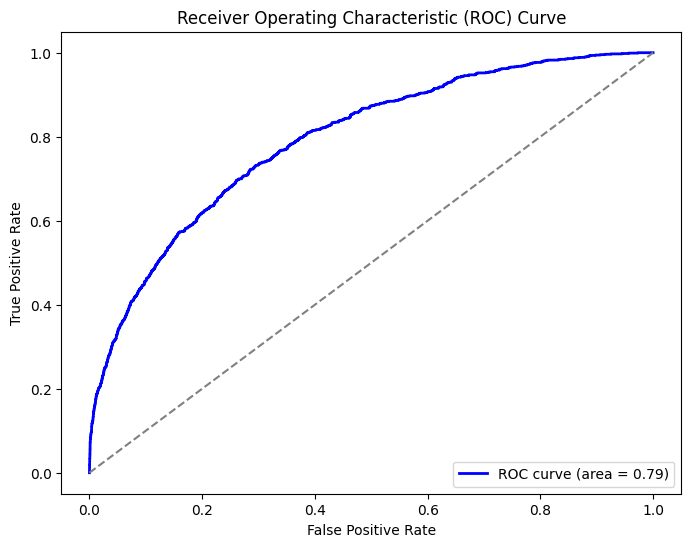

Best Threshold: 0.0954379586424077
Sensitivity (True Positive Rate) at best threshold: 0.7319778188539742
False Positive Rate at best threshold: 0.29495726495726493


In [27]:
# Рассчитайте ROC-кривую
fpr, tpr, thresholds = roc_curve(y_test, np.average(predictions, axis=0, weights=weights))

# Вычислите площадь под ROC-кривой (ROC AUC)
roc_auc = roc_auc_score(y_test, np.average(predictions, axis=0, weights=weights))

# Нарисуйте ROC-кривую
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Найдите порог, максимизирующий чувствительность и минимизирующий ложноположительные результаты
best_threshold_idx = np.argmax(tpr - fpr)
best_threshold = thresholds[best_threshold_idx]
best_tpr = tpr[best_threshold_idx]
best_fpr = fpr[best_threshold_idx]

print("Best Threshold:", best_threshold)
print("Sensitivity (True Positive Rate) at best threshold:", best_tpr)
print("False Positive Rate at best threshold:", best_fpr)


In [28]:
# x_train, x_test, y_train, y_test = train_test_split(X, y,\
#                         test_size = 0.20, random_state = 142, stratify=y)
# # print(x_train.shape)
# # x_concat = []
# # y_concat = []
# # for i in tqdm(range(35)):
# #     x_x = x_train.loc[y_train[y_train == 1]]
# #     y_x = y_train[y_train == 1]
# #     x_concat.append(x_x)
# #     y_concat.append(y_x)


# # x_train = pd.concat([x_train] + x_concat)
# # y_train = pd.concat([y_train] + y_concat)
# # x_train.index = range(x_train.shape[0])
# # y_train.index = range(x_train.shape[0])
# # x_train = x_train.sample(frac=1)
# # y_train = y_train.loc[x_train.index]
# # x_train.index = range(x_train.shape[0])
# # y_train.index = range(x_train.shape[0])
                    
# # X = pd.concat([x_train, x_test])
# # y = pd.concat([y_train, y_test])

# # X.index = range(X.shape[0])
# # y.index = range(X.shape[0])

# # print(x_train.shape[0], y_train.shape[0])

In [29]:
# Обучение моделей на всей выборки
models = []

In [30]:
#Объедененные фичи
t = pd.read_csv('features_X_train__v3.csv')
X = t.drop('target', axis=1)
y = t['target']


#Определение категориальных
cat_col = X.select_dtypes(include=['object']).columns.tolist()
y.shape, X.shape

((64000,), (64000, 1154))

In [31]:
t_d = df_transactions.groupby(['user_id','day'])['mcc_code'].nunique() 
# t_d = df_transactions.groupby(['user_id','day'])['day'].count() 
t1 = t_d[t_d>11].unstack()
t2 = df_train[['user_id']].merge(t1, on='user_id')

#Объедененные фичи
t = pd.read_csv('features_X_train__v3.csv')
t = t[~t['user_id'].isin(t2['user_id'])]
X = t.drop('target', axis=1)
y = t['target']


#Определение категориальных
cat_col = X.select_dtypes(include=['object']).columns.tolist()
y.shape, X.shape

((63907,), (63907, 1154))

In [32]:
for i in tqdm(params_cat):
    catboost_model = CatBoostClassifier(verbose=False, **i)
    models.append((catboost_model.fit(X,y),'cat'))

for i in tqdm(params_xgb):
    model_xgb = XGBClassifier(**i)
    models.append((model_xgb.fit(X.drop(cat_col, axis=1),y),'xgb'))
    # models.append(stratified(X, y, i, n_splits=20, test_size=0.2, random_state=142)[1])
    # print('----------------------------------------------')

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

In [33]:
# t_d = df_transactions.groupby(['user_id','day'])['day'].nunique() 
t_d = df_transactions.groupby(['user_id','day'])['day'].count() 
t1 = t_d[t_d>20].unstack()
t2 = df_train[['user_id']].merge(t1, on='user_id')

#Объедененные фичи
t = pd.read_csv('features_X_train__v3.csv')
t = t[~t['user_id'].isin(t2['user_id'])]
X = t.drop('target', axis=1)
y = t['target']


#Определение категориальных
cat_col = X.select_dtypes(include=['object']).columns.tolist()
y.shape, X.shape

((63704,), (63704, 1154))

In [34]:
for i in tqdm(params_cat):
    catboost_model = CatBoostClassifier(verbose=False, **i)
    models.append((catboost_model.fit(X,y),'cat'))

for i in tqdm(params_xgb):
    model_xgb = XGBClassifier(**i)
    models.append((model_xgb.fit(X.drop(cat_col, axis=1),y),'xgb'))
    # models.append(stratified(X, y, i, n_splits=20, test_size=0.2, random_state=142)[1])
    # print('----------------------------------------------')

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

# SUBMISSION

In [35]:
df_sub = pd.read_csv('sample_submit_naive.csv')
X_sub = pd.read_csv('features_X_test__v3.csv')
df_sub_2 = df_sub.copy()

t2 = df_sub[['user_id']].merge(t1, on='user_id')
df_sub_1 = df_sub[~df_sub['user_id'].isin(t2['user_id'])]
df_sub_2 = df_sub_2[df_sub['user_id'].isin(t2['user_id'])]
df_sub_1.shape, df_sub_2.shape, df_sub.shape

((31842, 2), (158, 2), (32000, 2))

In [36]:
X_sub_1 = df_sub_1[['user_id']].merge(X_sub, on='user_id')
X_sub_1 = X_sub_1[X.columns] 

In [37]:
predictions = []

for i in models:
    if i[1] == 'cat':
        predictions.append(i[0].predict_proba(X_sub_1)[:,1])
    else:
        predictions.append(i[0].predict_proba(X_sub_1.drop(cat_col, axis=1))[:,1])

# X_padded_test = torch.tensor(MinMaxScaler(feature_range=(0, 15)).fit_transform(X_sub_1.drop(cat_col, axis=1)))
# model.eval().to('cpu')  # переводим модель в режим оценки
# with torch.no_grad():  # отключаем вычисление градиентов
#             outputs = model(X_padded_test)
#             predictions.append(outputs.view(-1).to('cpu').numpy())         

In [38]:
weights = list(best_weights.values())
weights

[0.0326845485816302,
 0.07611115124466114,
 0.04874035688931024,
 0.19720822802789112,
 0.18240758713194616,
 0.9151935479861298,
 0.11969658014467167,
 7.433970867774722e-05]

In [39]:
X_sub_2 = df_sub_2[['user_id']].merge(X_sub, on='user_id')
X_sub_2 = X_sub_2[X.columns] 

In [40]:
predictions_sub = []

for i in models:
    if i[1] == 'cat':
        predictions_sub.append(i[0].predict_proba(X_sub_2)[:,1])
    else:
        predictions_sub.append(i[0].predict_proba(X_sub_2.drop(cat_col, axis=1))[:,1])

# X_padded_test = torch.tensor(MinMaxScaler(feature_range=(0, 15)).fit_transform(X_sub_2.drop(cat_col, axis=1)))
# model.eval().to('cpu')  # переводим модель в режим оценки
# with torch.no_grad():  # отключаем вычисление градиентов
#             outputs = model(X_padded_test)
#             predictions_sub.append(outputs.view(-1).to('cpu').numpy())           

In [41]:
df_sub_1['predict'] = np.average(predictions, axis=0, weights=weights)
# для непонятной выборки предсказание
df_sub_2['predict'] = np.average(predictions_sub, axis=0, weights=weights)

In [42]:
df_sub  = pd.concat([df_sub_1, df_sub_2])
df_sub

,user_id,predict
0,9,0.02
1,61,0.02
2,62,0.04
3,80,0.01
4,88,0.17
...,...,...
30484,525643,0.52
31332,539688,0.29
31691,547912,0.50
31897,554211,0.47


In [43]:
current_time = datetime.datetime.now().strftime("%Y-%m-%d_%H:%M:%S")
df_sub.to_csv(f'sub_{current_time}.csv', index=False)